Implement a KNN model to classify the animals in to categorie

In [43]:
# KNN Classification
import  pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [44]:
zoo = pd.read_csv('/content/Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [45]:
np.unique(zoo['type'])

array([1, 2, 3, 4, 5, 6, 7])

In [46]:
x=zoo.iloc[:,1:17]
y=zoo.iloc[:,17]

In [47]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((70, 16), (70,), (31, 16), (31,))

**Finding the optimal K value for KNN model by gridsearch method**

In [48]:

n_neighbors = np.array(range(1,20))
param_grid = dict(n_neighbors=n_neighbors)

In [49]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [50]:

# Best score and its parameter
print(grid.best_score_)
print(grid.best_params_)

0.9714285714285715
{'n_neighbors': 1}


In [51]:
# As the best k value id given as 1 from gridsearch method, we are taking k=2 for avoiding overfit problem

In [52]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [53]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts()

1    15
6     6
2     3
4     2
7     2
5     2
3     1
dtype: int64

In [54]:
pd.crosstab(y_test,preds)

col_0,1,2,3,4,5,6,7
type,,,,,,,
1,15,0,0,0,0,0,0
2,0,3,0,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,0,2,0,0,0
5,0,0,0,0,2,0,0
6,0,0,0,0,0,5,0
7,0,0,0,0,0,1,2


In [55]:
# We got accuracy of 96% for our model

In [56]:
np.mean(preds==y_test)

0.967741935483871

**Ploting graph of accuracy with the k values we use**

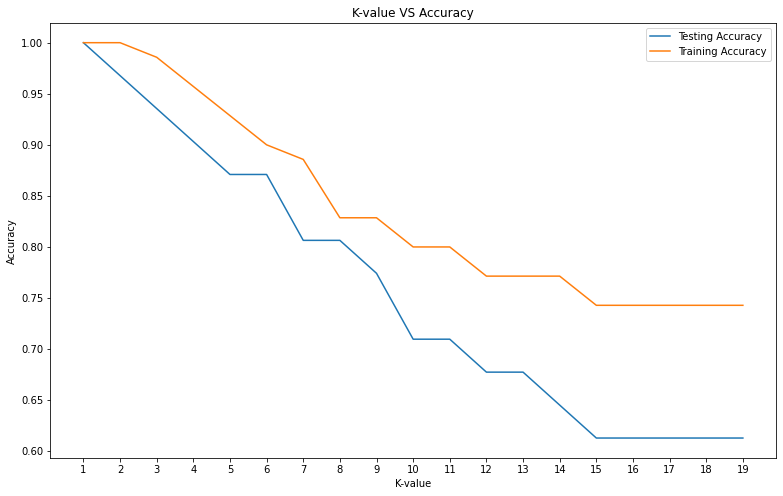

Best accuracy is 1.0 with K = 1


In [57]:
import matplotlib.pyplot as plt 
%matplotlib inline
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))

    # Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-value VS Accuracy')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

**EDA**

In [58]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [59]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

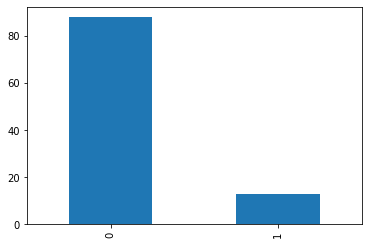

0    88
1    13
Name: domestic, dtype: int64


In [60]:
zoo['domestic'].value_counts(sort=True).plot.bar()
plt.show()
print(zoo['domestic'].value_counts())

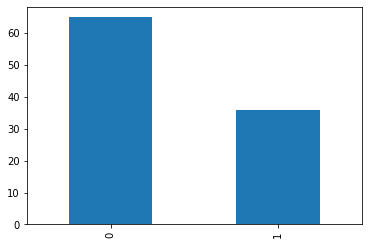

0    65
1    36
Name: aquatic, dtype: int64


In [61]:
zoo['aquatic'].value_counts().plot.bar()
plt.show()
print(zoo['aquatic'].value_counts())

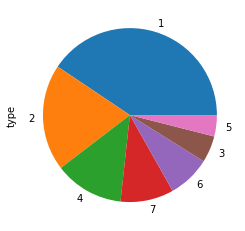

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64


In [62]:
zoo['type'].value_counts().plot.pie()
plt.show()
print(zoo['type'].value_counts())

In [63]:
array = zoo.values
X=zoo.iloc[:,1:17]
Y=zoo.iloc[:,-1]

In [64]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [65]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

**Grid Search for Algorithm Tuning**

Grid search for Entire Dataset

In [66]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [67]:
num_folds = 10
kfold = KFold(n_splits=5)

In [68]:
n_neighbors = numpy.array(range(1,50))
param_grid = dict(n_neighbors=n_neighbors)

In [69]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [70]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


**Grid Search for Train Dataset**

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
train,test= train_test_split(zoo,test_size=0.2,random_state=40)

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [74]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [75]:
model1 = KNeighborsClassifier()
grid1 = GridSearchCV(estimator=model1, param_grid=param_grid)
grid1.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [76]:
print(grid1.best_score_)
print(grid1.best_params_)

0.975
{'n_neighbors': 1}


In [77]:
KNN_results1 = cross_val_score(grid1, X_train, Y_train, cv=kfold)
print(KNN_results1.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


0.975


In [78]:
KNN_preds1 = grid1.predict(X_train)
pd.crosstab(Y_train,KNN_preds1)

col_0,1,2,3,4,5,6,7
type,,,,,,,
1,29,0,0,0,0,0,0
2,0,18,0,0,0,0,0
3,0,0,4,0,0,0,0
4,0,0,0,11,0,0,0
5,0,0,0,0,4,0,0
6,0,0,0,0,0,5,0
7,0,0,0,0,0,0,9


**Grid Search for Test Dataset**

In [79]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [80]:
model2 = KNeighborsClassifier()
grid2 = GridSearchCV(estimator=model2, param_grid=param_grid)
grid2.fit(X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 214, in predict
 

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [81]:
print(grid2.best_score_)
print(grid2.best_params_)

0.8699999999999999
{'n_neighbors': 1}


**Visualizing the CV results**

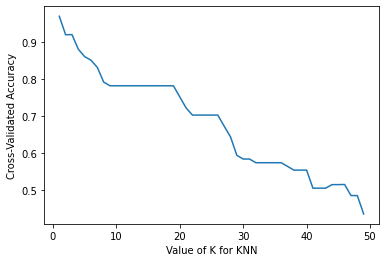

In [82]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 50
k_range = range(1, 50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=4)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

**Plot test accuracy and train accuracy**

In [83]:
print(train.shape)

(80, 18)


In [84]:
print(test.shape)

(21, 18)


In [85]:
from sklearn.neighbors import KNeighborsClassifier as KNC

In [86]:
import warnings
warnings.filterwarnings("ignore")

In [87]:
model2 = KNeighborsClassifier()
grid2 = GridSearchCV(estimator=model2, param_grid=param_grid)
grid2.fit(X_test, Y_test)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [88]:
KNN_results2 = cross_val_score(grid1, X_test, Y_test, cv=kfold)
print(KNN_results2.mean())

0.76


In [89]:
KNN_preds2 = grid1.predict(X_test)
pd.crosstab(Y_test,KNN_preds2)

col_0,1,2,3,4,6,7
type,,,,,,
1,12,0,0,0,0,0
2,0,2,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,2,0,0
6,0,0,0,0,3,0
7,0,0,0,0,0,1


In [90]:
accuracy=[]
for i in range(3,50,2):
    neighbour = KNC(n_neighbors=i)
    neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
    train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
    test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
    accuracy.append([train_acc,test_acc])
print(accuracy)
print(len(accuracy))

[[0.9875, 0.8095238095238095], [0.9375, 0.7619047619047619], [0.8875, 0.7619047619047619], [0.8375, 0.7619047619047619], [0.8375, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7619047619047619], [0.7875, 0.7142857142857143], [0.7125, 0.6666666666666666], [0.7125, 0.6666666666666666], [0.7125, 0.6666666666666666], [0.7125, 0.6666666666666666], [0.6125, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5625, 0.6190476190476191], [0.5375, 0.6190476190476191], [0.5125, 0.6190476190476191]]
24


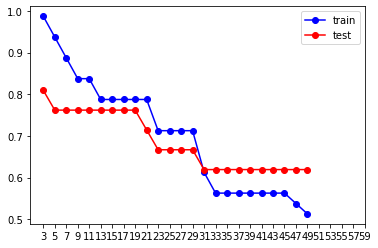

In [91]:
plt.plot(np.arange(3,50,2),[i[0] for i in accuracy],"bo-")
plt.plot(np.arange(3,50,2),[i[1] for i in accuracy],"ro-")
plt.legend(["train","test"])
plt.xticks(np.arange(3,60,2))
plt.show()

In [92]:
# Model for K=2
neighbour=KNC(n_neighbors=2)

In [93]:
neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
print("K=2 : ",train_acc,test_acc)

K=2 :  1.0 0.8095238095238095


In [94]:
# Model for K=3
neighbour=KNC(n_neighbors=3)

In [95]:
neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
print("K=3 : ",train_acc,test_acc)

K=3 :  0.9875 0.8095238095238095


In [96]:
# Model for K=4
neighbour=KNC(n_neighbors=4)

In [97]:
neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
print("K=4 : ",train_acc,test_acc)

K=4 :  0.9375 0.7619047619047619


In [98]:
# Model for K=5
neighbour=KNC(n_neighbors=5)

In [99]:
neighbour.fit(train.iloc[:,1:17],train.iloc[:,-1])
train_acc= np.mean(neighbour.predict(train.iloc[:,1:17])==train.iloc[:,-1])
test_acc= np.mean(neighbour.predict(test.iloc[:,1:17])==test.iloc[:,-1])
print("K=5 : ",train_acc,test_acc)

K=5 :  0.9375 0.7619047619047619


From all the abobe results we can see that, For K = 3 the model gives best accuracy

From above plot we can see the accuracy for train and test data we get when we use respective k values

For our data K=1 has best accuracy